### Importing needed libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from prophet import Prophet

c:\Users\USER\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


### Morocco

In [2]:
Morocco_dataset = pd.read_excel('Morocco_Dataset.xlsx')

In [3]:
Morocco_dataset.head(20)

,Country or region,Country code,ds,Bioenergy_yhat,Coal_yhat,Gas_yhat,Hydro_yhat,Solar_yhat,Wind_yhat,Emission
0,Morocco,RAM,2000-01-01,0.01,0.55,7.90,5.69,0.00,0,735.367
1,Morocco,RAM,2001-01-01,0.01,0.58,8.40,5.85,0.00,0,730.986
2,Morocco,RAM,2002-01-01,0.01,0.76,11.75,8.15,0.00,0,735.488
3,Morocco,RAM,2003-01-01,0.01,0.73,11.24,7.37,0.00,0,711.772
4,Morocco,RAM,2004-01-01,0.02,0.93,14.27,8.03,0.00,0,709.714
5,Morocco,RAM,2005-01-01,0.01,0.82,14.01,7.69,0.00,0,701.119
6,Morocco,RAM,2006-01-01,0.01,0.87,14.96,6.20,0.00,0,702.647
7,Morocco,RAM,2007-01-01,0.01,0.80,14.94,6.16,0.00,0,701.655
8,Morocco,RAM,2008-01-01,0.01,0.66,13.81,5.66,0.00,0,700.611
9,Morocco,RAM,2009-01-01,0.01,0.63,13.70,4.48,0.00,0,638.861


In [4]:
#Remove a column in the dataset
Morocco_dataset = Morocco_dataset.drop(['Emission'], axis=1)

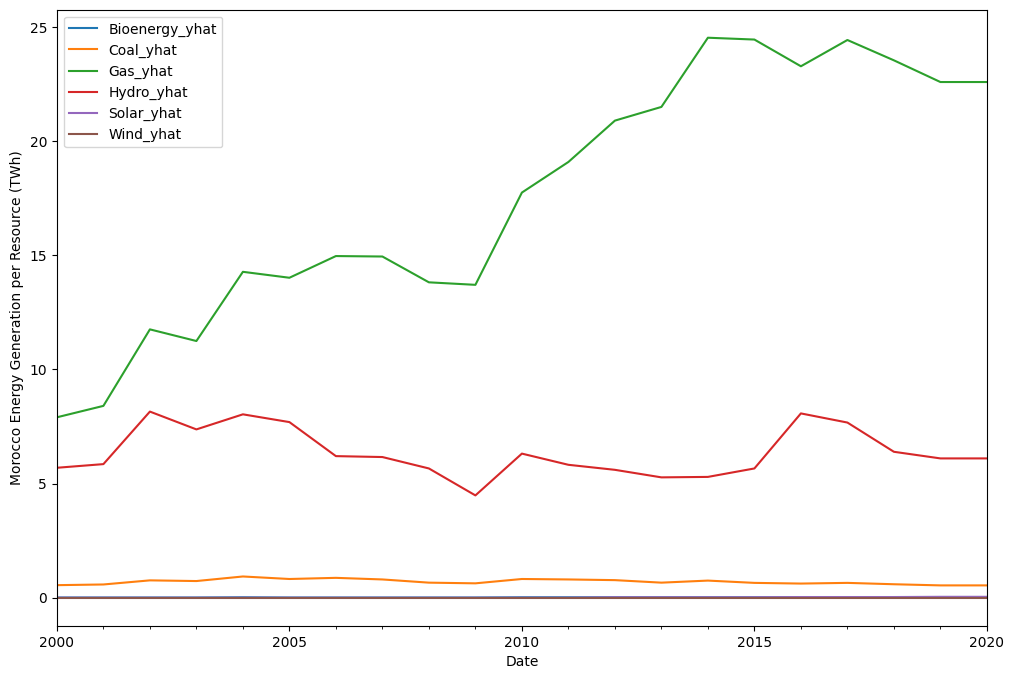

In [5]:
ax = Morocco_dataset.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Morocco Energy Generation per Resource (TWh)')
ax.set_xlabel('Date')  
plt.show()

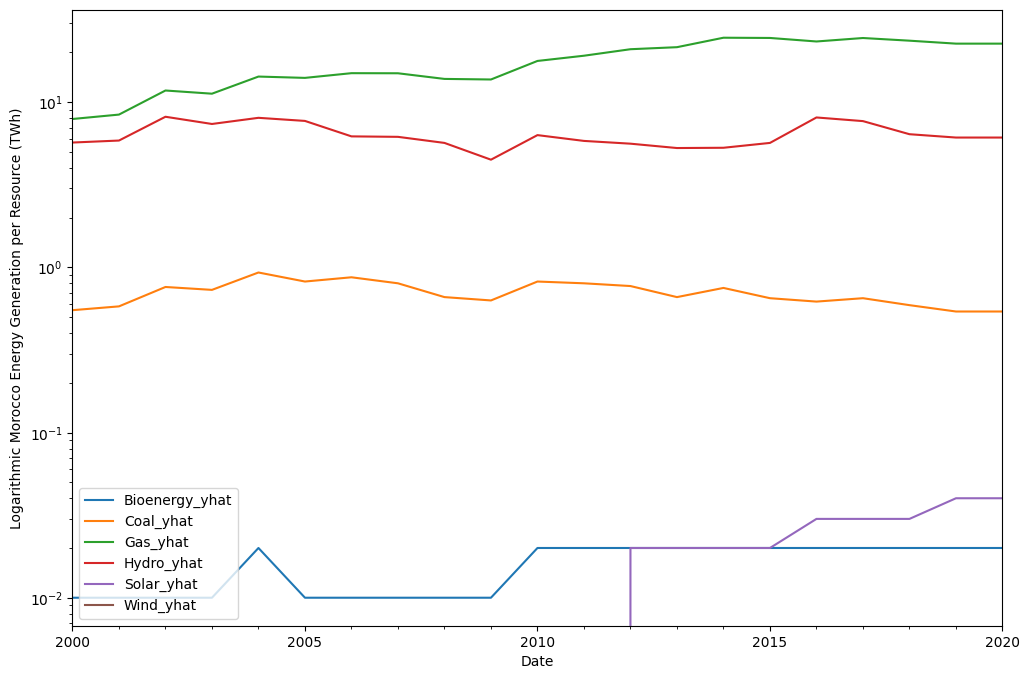

In [6]:
# Make y-axis in log scale
ax = Morocco_dataset.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Logarithmic Morocco Energy Generation per Resource (TWh)')
ax.set_xlabel('Date')  
ax.set_yscale('log')
plt.show()

#### Morocco's bioenergy

In [7]:
Morocco_BioenergyModel = Prophet()

##### Model Validation


In [8]:
Morocco_BioenergyValidationModel = Prophet()
columns_to_load = ['ds', 'Bioenergy_yhat']
dataset_bioenergy = pd.read_excel('Morocco_Dataset.xlsx', usecols=columns_to_load)
dataset_bioenergy = dataset_bioenergy.rename(columns={'ds': 'ds',
                        'Bioenergy_yhat': 'y'})

# Take just the first 15 rows for training
dataset_bioenergy_validation = dataset_bioenergy[:15]
Morocco_BioenergyValidationModel.fit(dataset_bioenergy_validation)
future_years_validation = pd.date_range(start='2015', end='2021', freq='Y')
future_validation = pd.DataFrame({'ds': future_years_validation})
forecast_validation = Morocco_BioenergyValidationModel.predict(future_validation)

18:21:57 - cmdstanpy - INFO - Chain [1] start processing
18:21:57 - cmdstanpy - INFO - Chain [1] done processing


In [9]:
datasetX = dataset_bioenergy[15:]
forecast_validation = forecast_validation[['ds', 'yhat']]

pred = forecast_validation['yhat']
correc = datasetX['y']
# Calculate the mean square error
error1 = mean_squared_error(correc, pred)
print('Mean Squared Error: %.3f' % error1)

# Calculate the root mean square error
error2 = np.sqrt(mean_squared_error(correc, pred))
print('Root Mean Squared Error: %.3f' % error2)

# Calculate the mean absolute percentage error
error3 = np.mean(np.abs((correc - pred) / correc)) * 100
print('Mean Absolute Percentage Error: %.3f' % error3)

Mean Squared Error: 0.000
Root Mean Squared Error: 0.007
Mean Absolute Percentage Error: nan


#### Model Training


In [10]:
columns_to_load = ['ds', 'Bioenergy_yhat']
dataset_bioenergy = pd.read_excel('Morocco_Dataset.xlsx', usecols=columns_to_load)
dataset_bioenergy = dataset_bioenergy.rename(columns={'ds': 'ds',
                        'Bioenergy_yhat': 'y'})
Morocco_BioenergyModel.fit(dataset_bioenergy)

18:21:57 - cmdstanpy - INFO - Chain [1] start processing
18:21:57 - cmdstanpy - INFO - Chain [1] done processing


In [11]:
future_years = pd.date_range(start='2021', end='2051', freq='Y')
future = pd.DataFrame({'ds': future_years})
forecast = Morocco_BioenergyModel.predict(future)

In [12]:
columns_to_load = ['ds', 'yhat']
forecasted_values =forecast.loc[:, columns_to_load]
forecasted_values = forecasted_values.rename(columns={'ds': 'ds',
                        'yhat': 'y'})   
Morocco_Bioenergy = pd.concat([dataset_bioenergy, forecasted_values], ignore_index=True)
Morocco_Bioenergy = Morocco_Bioenergy.rename(columns={'ds': 'ds', 'y': 'Bioenergy_yhat'})
Morocco_Bioenergy.head(51)

,ds,Bioenergy_yhat
0,2000-01-01,0.010000
1,2001-01-01,0.010000
2,2002-01-01,0.010000
3,2003-01-01,0.010000
4,2004-01-01,0.020000
5,2005-01-01,0.010000
6,2006-01-01,0.010000
7,2007-01-01,0.010000
8,2008-01-01,0.010000
9,2009-01-01,0.010000


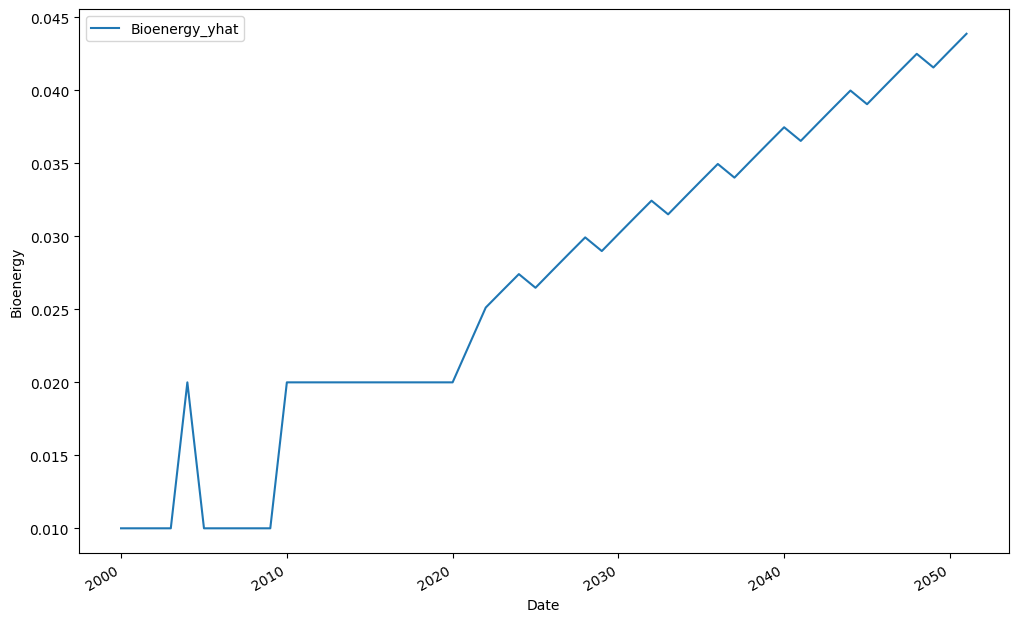

In [13]:
ax = Morocco_Bioenergy.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Bioenergy')
ax.set_xlabel('Date')
plt.show()

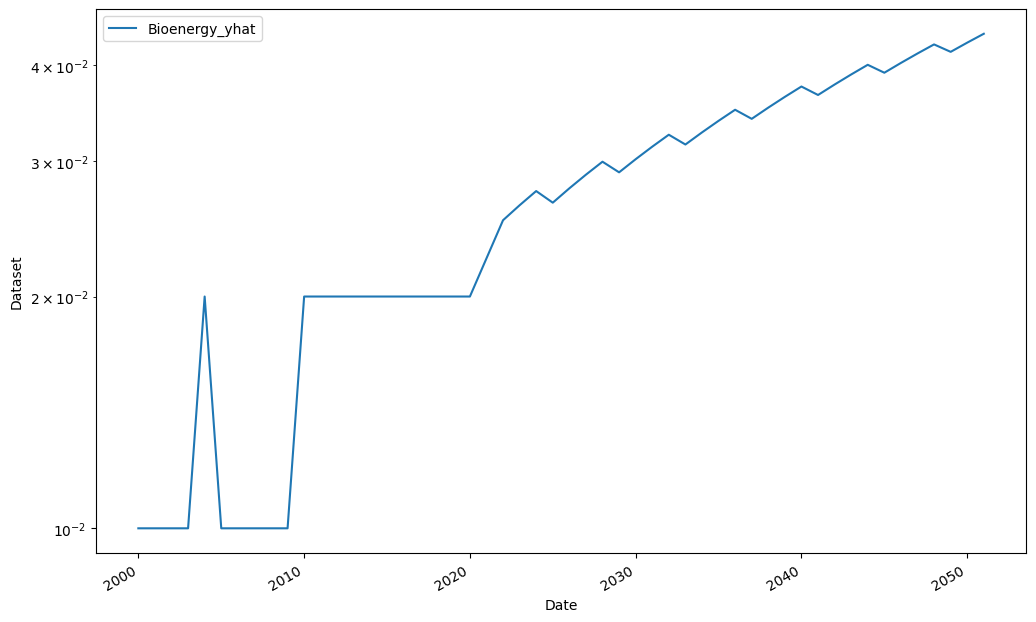

In [14]:
# Make y-axis in log scale
ax = Morocco_Bioenergy.set_index('ds').plot(figsize=(12, 8))
ax.set_ylabel('Dataset')
ax.set_xlabel('Date')  
ax.set_yscale('log')
plt.show()

#### Morocco Coal Model

In [15]:
Morocco_CoalModel = Prophet()

Morocco_CoalValidationModel = Prophet()
columns_to_load = ['ds', 'Coal_yhat']
dataset_Coal = pd.read_excel('Morocco_Dataset.xlsx', usecols=columns_to_load)
dataset_Coal = dataset_Coal.rename(columns={'ds': 'ds',
                        'Coal_yhat': 'y'})

# Take just the first 15 rows for training
dataset_CoalValidation = dataset_Coal[:15]
Morocco_CoalValidationModel.fit(dataset_CoalValidation)
Coal_future_years_validation = pd.date_range(start='2015', end='2021', freq='Y')
Coal_future_validation = pd.DataFrame({'ds': Coal_future_years_validation})
Coal_forecast_validation = Morocco_CoalValidationModel.predict(Coal_future_validation)

CoaldatasetX = dataset_Coal[15:]
Coal_forecast_validation = Coal_forecast_validation[['ds', 'yhat']]

CoalPred = Coal_forecast_validation['yhat']
CoalCorrec = CoaldatasetX['y']
# Calculate the mean square error
error1 = mean_squared_error(CoalCorrec, CoalPred)
print('Mean Squared Error: %.3f' % error1)

# Calculate the root mean square error
error2 = np.sqrt(mean_squared_error(CoalCorrec, CoalPred))
print('Root Mean Squared Error: %.3f' % error2)

# Calculate the mean absolute percentage error
error3 = np.mean(np.abs((CoalCorrec - CoalPred) / CoalCorrec)) * 100
print('Mean Absolute Percentage Error: %.3f' % error3)

18:21:59 - cmdstanpy - INFO - Chain [1] start processing
18:21:59 - cmdstanpy - INFO - Chain [1] done processing


Mean Squared Error: 0.036
Root Mean Squared Error: 0.190
Mean Absolute Percentage Error: nan


In [16]:
columns_to_load = ['ds', 'Coal_yhat']
dataset_Coal = pd.read_excel('Morocco_Dataset.xlsx', usecols=columns_to_load)
dataset_Coal = dataset_Coal.rename(columns={'ds': 'ds',
                        'Coal_yhat': 'y'})
Morocco_CoalModel.fit(dataset_Coal)

CoalFuture_years = pd.date_range(start='2021', end='2051', freq='Y')
CoalFuture = pd.DataFrame({'ds': CoalFuture_years})
CoalForecast = Morocco_CoalModel.predict(CoalFuture)
columns_to_load = ['ds', 'yhat']
CoalForecasted_values = CoalForecast.loc[:, columns_to_load]
CoalForecasted_values = CoalForecasted_values.rename(columns={'ds': 'ds',
                        'yhat': 'y'})   
Morocco_Coal = pd.concat([dataset_Coal, CoalForecasted_values], ignore_index=True)
Morocco_Coal = Morocco_Coal.rename(columns={'ds': 'ds', 'y': 'Coal_yhat'})


18:22:00 - cmdstanpy - INFO - Chain [1] start processing
18:22:00 - cmdstanpy - INFO - Chain [1] done processing


In [17]:


Morocco_Coal.head(51)

,ds,Coal_yhat
0,2000-01-01,0.550000
1,2001-01-01,0.580000
2,2002-01-01,0.760000
3,2003-01-01,0.730000
4,2004-01-01,0.930000
5,2005-01-01,0.820000
6,2006-01-01,0.870000
7,2007-01-01,0.800000
8,2008-01-01,0.660000
9,2009-01-01,0.630000


#### Morocco Gas 


In [18]:
Morocco_GasModel = Prophet()

Morocco_GasValidationModel = Prophet()
columns_to_load = ['ds', 'Gas_yhat']
dataset_Gas = pd.read_excel('Morocco_Dataset.xlsx', usecols=columns_to_load)
dataset_Gas = dataset_Gas.rename(columns={'ds': 'ds',
                        'Gas_yhat': 'y'})

# Take just the first 15 rows for training
dataset_GasValidation = dataset_Gas[:15]
Morocco_GasValidationModel.fit(dataset_GasValidation)
Gas_future_years_validation = pd.date_range(start='2015', end='2021', freq='Y')
Gas_future_validation = pd.DataFrame({'ds': Gas_future_years_validation})
Gas_forecast_validation = Morocco_GasValidationModel.predict(Gas_future_validation)

GasdatasetX = dataset_Gas[15:]
Gas_forecast_validation = Gas_forecast_validation[['ds', 'yhat']]

GasPred = Gas_forecast_validation['yhat']
GasCorrec = GasdatasetX['y']
# Calculate the mean square error
error1 = mean_squared_error(GasCorrec, GasPred)
print('Mean Squared Error: %.3f' % error1)

# Calculate the root mean square error
error2 = np.sqrt(mean_squared_error(GasCorrec, GasPred))
print('Root Mean Squared Error: %.3f' % error2)

# Calculate the mean absolute percentage error
error3 = np.mean(np.abs((GasCorrec - GasPred) / GasCorrec)) * 100
print('Mean Absolute Percentage Error: %.3f' % error3)

18:22:00 - cmdstanpy - INFO - Chain [1] start processing
18:22:01 - cmdstanpy - INFO - Chain [1] done processing


Mean Squared Error: 10.724
Root Mean Squared Error: 3.275
Mean Absolute Percentage Error: nan


In [19]:
columns_to_load = ['ds', 'Gas_yhat']
dataset_Gas = pd.read_excel('Morocco_Dataset.xlsx', usecols=columns_to_load)
dataset_Gas = dataset_Gas.rename(columns={'ds': 'ds',
                        'Gas_yhat': 'y'})
Morocco_GasModel.fit(dataset_Gas)

GasFuture_years = pd.date_range(start='2021', end='2051', freq='Y')
GasFuture = pd.DataFrame({'ds': GasFuture_years})
GasForecast = Morocco_GasModel.predict(GasFuture)
columns_to_load = ['ds', 'yhat']
GasForecasted_values = GasForecast.loc[:, columns_to_load]
GasForecasted_values = GasForecasted_values.rename(columns={'ds': 'ds',
                        'yhat': 'y'})   
Morocco_Gas = pd.concat([dataset_Gas, GasForecasted_values], ignore_index=True)
Morocco_Gas = Morocco_Gas.rename(columns={'ds': 'ds', 'y': 'Gas_yhat'})

18:22:01 - cmdstanpy - INFO - Chain [1] start processing
18:22:01 - cmdstanpy - INFO - Chain [1] done processing


In [20]:
Morocco_Gas.head(51)

,ds,Gas_yhat
0,2000-01-01,7.900000
1,2001-01-01,8.400000
2,2002-01-01,11.750000
3,2003-01-01,11.240000
4,2004-01-01,14.270000
5,2005-01-01,14.010000
6,2006-01-01,14.960000
7,2007-01-01,14.940000
8,2008-01-01,13.810000
9,2009-01-01,13.700000


#### Morocco Hydro

In [21]:
Morocco_HydroModel = Prophet()

Morocco_HydroValidationModel = Prophet()
columns_to_load = ['ds', 'Hydro_yhat']
dataset_Hydro = pd.read_excel('Morocco_Dataset.xlsx', usecols=columns_to_load)
dataset_Hydro = dataset_Hydro.rename(columns={'ds': 'ds',
                        'Hydro_yhat': 'y'})

# Take just the first 15 rows for training
dataset_HydroValidation = dataset_Hydro[:15]
Morocco_HydroValidationModel.fit(dataset_HydroValidation)
Hydro_future_years_validation = pd.date_range(start='2015', end='2021', freq='Y')
Hydro_future_validation = pd.DataFrame({'ds': Hydro_future_years_validation})
Hydro_forecast_validation = Morocco_HydroValidationModel.predict(Hydro_future_validation)

HydrodatasetX = dataset_Hydro[15:]
Hydro_forecast_validation = Hydro_forecast_validation[['ds', 'yhat']]

HydroPred = Hydro_forecast_validation['yhat']
HydroCorrec = HydrodatasetX['y']
# Calculate the mean square error
error1 = mean_squared_error(HydroCorrec, HydroPred)
print('Mean Squared Error: %.3f' % error1)

# Calculate the root mean square error
error2 = np.sqrt(mean_squared_error(HydroCorrec, HydroPred))
print('Root Mean Squared Error: %.3f' % error2)

# Calculate the mean absolute percentage error
error3 = np.mean(np.abs((HydroCorrec - HydroPred) / HydroCorrec)) * 100
print('Mean Absolute Percentage Error: %.3f' % error3)

18:22:02 - cmdstanpy - INFO - Chain [1] start processing
18:22:02 - cmdstanpy - INFO - Chain [1] done processing


Mean Squared Error: 5.520
Root Mean Squared Error: 2.349
Mean Absolute Percentage Error: nan


In [22]:
columns_to_load = ['ds', 'Hydro_yhat']
dataset_Hydro = pd.read_excel('Morocco_Dataset.xlsx', usecols=columns_to_load)
dataset_Hydro = dataset_Hydro.rename(columns={'ds': 'ds',
                        'Hydro_yhat': 'y'})
Morocco_HydroModel.fit(dataset_Hydro)

HydroFuture_years = pd.date_range(start='2021', end='2051', freq='Y')
HydroFuture = pd.DataFrame({'ds': HydroFuture_years})
HydroForecast = Morocco_HydroModel.predict(HydroFuture)
columns_to_load = ['ds', 'yhat']
HydroForecasted_values = HydroForecast.loc[:, columns_to_load]
HydroForecasted_values = HydroForecasted_values.rename(columns={'ds': 'ds',
                        'yhat': 'y'})   
Morocco_Hydro = pd.concat([dataset_Hydro, HydroForecasted_values], ignore_index=True)
Morocco_Hydro = Morocco_Hydro.rename(columns={'ds': 'ds', 'y': 'Hydro_yhat'})

18:22:02 - cmdstanpy - INFO - Chain [1] start processing
18:22:02 - cmdstanpy - INFO - Chain [1] done processing


In [23]:
Morocco_Hydro.head(51)

,ds,Hydro_yhat
0,2000-01-01,5.690000
1,2001-01-01,5.850000
2,2002-01-01,8.150000
3,2003-01-01,7.370000
4,2004-01-01,8.030000
5,2005-01-01,7.690000
6,2006-01-01,6.200000
7,2007-01-01,6.160000
8,2008-01-01,5.660000
9,2009-01-01,4.480000


#### Morocco Solar

In [24]:
Morocco_SolarModel = Prophet()

Morocco_SolarValidationModel = Prophet()
columns_to_load = ['ds', 'Solar_yhat']
dataset_Solar = pd.read_excel('Morocco_Dataset.xlsx', usecols=columns_to_load)
dataset_Solar = dataset_Solar.rename(columns={'ds': 'ds',
                        'Solar_yhat': 'y'})

# Take just the first 15 rows for training
dataset_SolarValidation = dataset_Solar[:15]
Morocco_SolarValidationModel.fit(dataset_SolarValidation)
Solar_future_years_validation = pd.date_range(start='2015', end='2021', freq='Y')
Solar_future_validation = pd.DataFrame({'ds': Solar_future_years_validation})
Solar_forecast_validation = Morocco_SolarValidationModel.predict(Solar_future_validation)

SolardatasetX = dataset_Solar[15:]
Solar_forecast_validation = Solar_forecast_validation[['ds', 'yhat']]

SolarPred = Solar_forecast_validation['yhat']
SolarCorrec = SolardatasetX['y']
# Calculate the mean square error
error1 = mean_squared_error(SolarCorrec, SolarPred)
print('Mean Squared Error: %.3f' % error1)

# Calculate the root mean square error
error2 = np.sqrt(mean_squared_error(SolarCorrec, SolarPred))
print('Root Mean Squared Error: %.3f' % error2)

# Calculate the mean absolute percentage error
error3 = np.mean(np.abs((SolarCorrec - SolarPred) / SolarCorrec)) * 100
print('Mean Absolute Percentage Error: %.3f' % error3)

18:22:03 - cmdstanpy - INFO - Chain [1] start processing
18:22:03 - cmdstanpy - INFO - Chain [1] done processing


Mean Squared Error: 0.000
Root Mean Squared Error: 0.013
Mean Absolute Percentage Error: nan


In [25]:
columns_to_load = ['ds', 'Solar_yhat']
dataset_Solar = pd.read_excel('Morocco_Dataset.xlsx', usecols=columns_to_load)
dataset_Solar = dataset_Solar.rename(columns={'ds': 'ds',
                        'Solar_yhat': 'y'})
Morocco_SolarModel.fit(dataset_Solar)

SolarFuture_years = pd.date_range(start='2021', end='2051', freq='Y')
SolarFuture = pd.DataFrame({'ds': SolarFuture_years})
SolarForecast = Morocco_SolarModel.predict(SolarFuture)
columns_to_load = ['ds', 'yhat']
SolarForecasted_values = SolarForecast.loc[:, columns_to_load]
SolarForecasted_values = SolarForecasted_values.rename(columns={'ds': 'ds',
                        'yhat': 'y'})   
Morocco_Solar = pd.concat([dataset_Solar, SolarForecasted_values], ignore_index=True)
Morocco_Solar = Morocco_Solar.rename(columns={'ds': 'ds', 'y': 'Solar_yhat'})

18:22:04 - cmdstanpy - INFO - Chain [1] start processing
18:22:04 - cmdstanpy - INFO - Chain [1] done processing


In [26]:
Morocco_Solar.head(51)

,ds,Solar_yhat
0,2000-01-01,0.000000
1,2001-01-01,0.000000
2,2002-01-01,0.000000
3,2003-01-01,0.000000
4,2004-01-01,0.000000
5,2005-01-01,0.000000
6,2006-01-01,0.000000
7,2007-01-01,0.000000
8,2008-01-01,0.000000
9,2009-01-01,0.000000


#### Morocco Wind

In [27]:
Morocco_WindModel = Prophet()

Morocco_WindValidationModel = Prophet()
columns_to_load = ['ds', 'Wind_yhat']
dataset_Wind = pd.read_excel('Morocco_Dataset.xlsx', usecols=columns_to_load)
dataset_Wind = dataset_Wind.rename(columns={'ds': 'ds',
                        'Wind_yhat': 'y'})

# Take just the first 15 rows for training
dataset_WindValidation = dataset_Wind[:15]
Morocco_WindValidationModel.fit(dataset_WindValidation)
Wind_future_years_validation = pd.date_range(start='2015', end='2021', freq='Y')
Wind_future_validation = pd.DataFrame({'ds': Wind_future_years_validation})
Wind_forecast_validation = Morocco_WindValidationModel.predict(Wind_future_validation)

WinddatasetX = dataset_Wind[15:]
Wind_forecast_validation = Wind_forecast_validation[['ds', 'yhat']]

WindPred = Wind_forecast_validation['yhat']
WindCorrec = WinddatasetX['y']
# Calculate the mean square error
error1 = mean_squared_error(WindCorrec, WindPred)
print('Mean Squared Error: %.3f' % error1)

# Calculate the root mean square error
error2 = np.sqrt(mean_squared_error(WindCorrec, WindPred))
print('Root Mean Squared Error: %.3f' % error2)

# Calculate the mean absolute percentage error
error3 = np.mean(np.abs((WindCorrec - WindPred) / WindCorrec)) * 100
print('Mean Absolute Percentage Error: %.3f' % error3)

Mean Squared Error: 0.000
Root Mean Squared Error: 0.000
Mean Absolute Percentage Error: nan


In [28]:
columns_to_load = ['ds', 'Wind_yhat']
dataset_Wind = pd.read_excel('Morocco_Dataset.xlsx', usecols=columns_to_load)
dataset_Wind = dataset_Wind.rename(columns={'ds': 'ds',
                        'Wind_yhat': 'y'})
Morocco_WindModel.fit(dataset_Wind)

WindFuture_years = pd.date_range(start='2021', end='2051', freq='Y')
WindFuture = pd.DataFrame({'ds': WindFuture_years})
WindForecast = Morocco_WindModel.predict(WindFuture)
columns_to_load = ['ds', 'yhat']
WindForecasted_values = WindForecast.loc[:, columns_to_load]
WindForecasted_values = WindForecasted_values.rename(columns={'ds': 'ds',
                        'yhat': 'y'})   
Morocco_Wind = pd.concat([dataset_Wind, WindForecasted_values], ignore_index=True)
Morocco_Wind = Morocco_Wind.rename(columns={'ds': 'ds', 'y': 'Wind_yhat'})

In [29]:
Morocco_Wind.head(51)

,ds,Wind_yhat
0,2000-01-01,0.0
1,2001-01-01,0.0
2,2002-01-01,0.0
3,2003-01-01,0.0
4,2004-01-01,0.0
5,2005-01-01,0.0
6,2006-01-01,0.0
7,2007-01-01,0.0
8,2008-01-01,0.0
9,2009-01-01,0.0


In [30]:
FullMoroccoData = pd.merge(Morocco_Bioenergy, Morocco_Coal, on='ds')
FullMoroccoData = pd.merge(FullMoroccoData, Morocco_Gas, on='ds')
FullMoroccoData = pd.merge(FullMoroccoData, Morocco_Hydro, on='ds')
FullMoroccoData = pd.merge(FullMoroccoData, Morocco_Solar, on='ds')
FullMoroccoData = pd.merge(FullMoroccoData, Morocco_Wind, on='ds')
FullMoroccoData.rename(columns={'ds': 'ds', 'Bioenergy_yhat': 'Bioenergy', 'Coal_yhat': 'Coal', 'Gas_yhat': 'Gas', 'Hydro_yhat': 'Hydro', 'Solar_yhat': 'Solar', 'Wind_yhat': 'Wind'}, inplace=True)
FullMoroccoData.head(51)

,ds,Bioenergy,Coal,Gas,Hydro,Solar,Wind
0,2000-01-01,0.010000,0.550000,7.900000,5.690000,0.000000,0.0
1,2001-01-01,0.010000,0.580000,8.400000,5.850000,0.000000,0.0
2,2002-01-01,0.010000,0.760000,11.750000,8.150000,0.000000,0.0
3,2003-01-01,0.010000,0.730000,11.240000,7.370000,0.000000,0.0
4,2004-01-01,0.020000,0.930000,14.270000,8.030000,0.000000,0.0
5,2005-01-01,0.010000,0.820000,14.010000,7.690000,0.000000,0.0
6,2006-01-01,0.010000,0.870000,14.960000,6.200000,0.000000,0.0
7,2007-01-01,0.010000,0.800000,14.940000,6.160000,0.000000,0.0
8,2008-01-01,0.010000,0.660000,13.810000,5.660000,0.000000,0.0
9,2009-01-01,0.010000,0.630000,13.700000,4.480000,0.000000,0.0


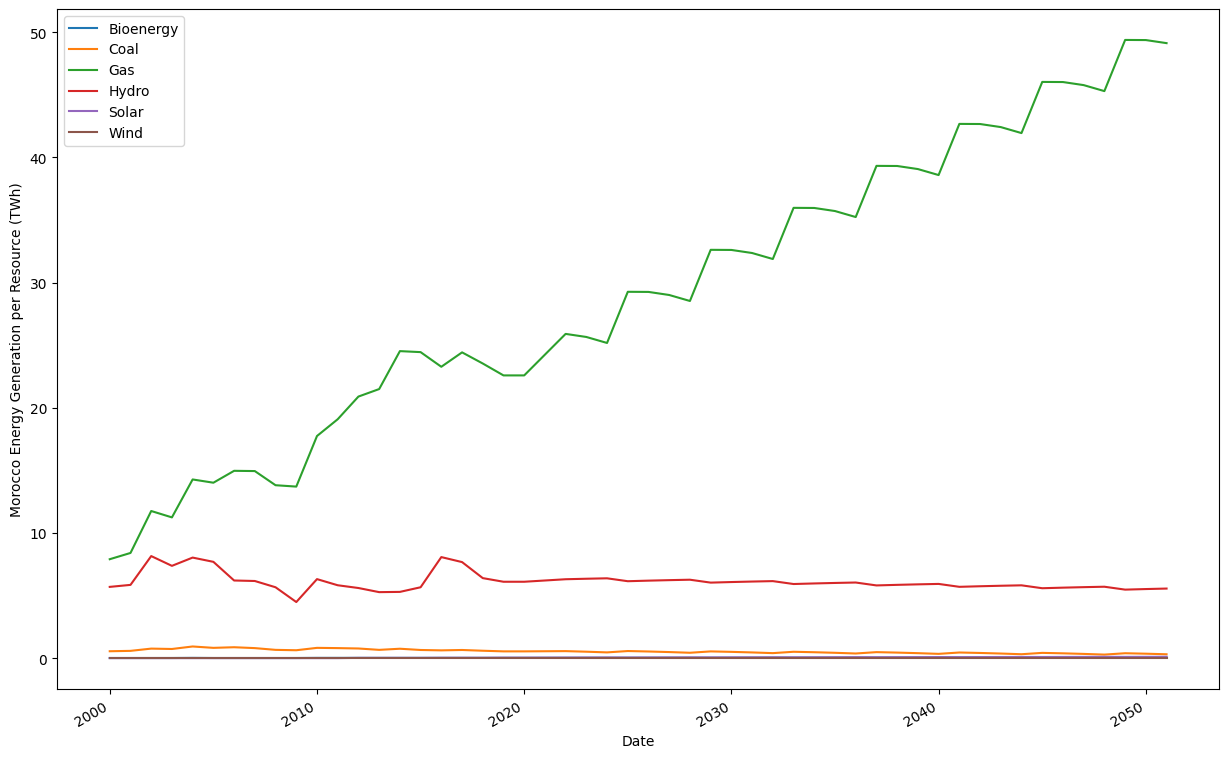

In [31]:
MoroccoPlot = FullMoroccoData.set_index('ds').plot(figsize=(15, 10))
MoroccoPlot.set_ylabel('Morocco Energy Generation per Resource (TWh)')
MoroccoPlot.set_xlabel('Date')  
plt.show()

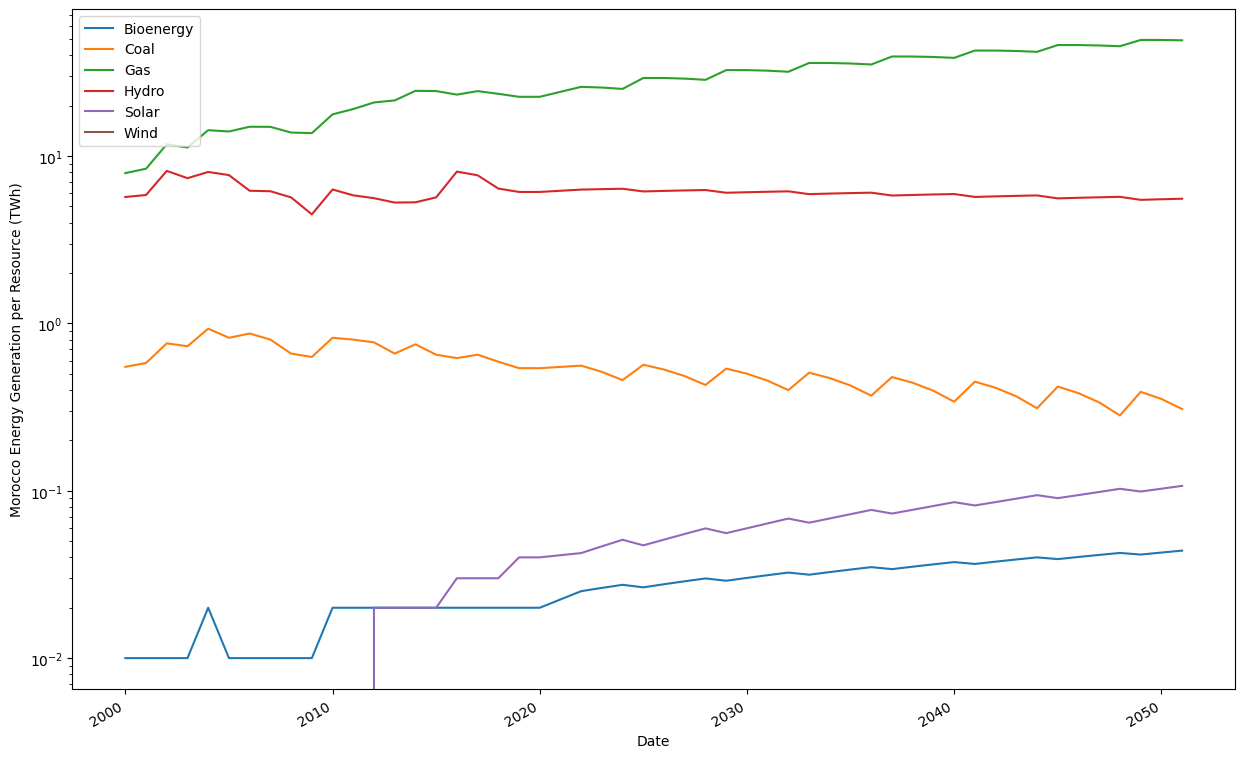

In [32]:
MoroccoPlot = FullMoroccoData.set_index('ds').plot(figsize=(15, 10))
MoroccoPlot.set_ylabel('Morocco Energy Generation per Resource (TWh)')
MoroccoPlot.set_xlabel('Date')  
MoroccoPlot.set_yscale('log')
plt.show()

In [33]:
Morocco_file_name = 'Predicted_Morocco_Dataset.xlsx'
FullMoroccoData.to_excel(Morocco_file_name, index=False)